## Visualizing Census Tract Internet Data

### By: Kaya and Maia

#### Adapted from: fcc_analysis.ipynb

In [58]:
import geopandas
import contextily as cx
import warnings
import pandas as pd
warnings.filterwarnings('ignore')

In [86]:
import os
import sys
sys.path[0] = os.path.join(os.path.abspath(''),'..')

In [87]:
import data_pipeline.spatial_operations as so

In [4]:
# import fcc geojson
fcc_df = geopandas.read_file("/tmp/internet-access-map/data/broadband.geojson")

In [54]:
fcc_df.head()

,geoid,n_isp,n_dn10,n_dn100,n_dn250,n_fiber_100u,fiber_100u_exists,max_dn,max_up,f_broadband,...,population,households,tests,devices,d_mbps,u_mbps,lat_ms,tests_per_cap,devices_per_cap,geometry
0,34005702808,2.143,2.143,1.000,1.000,0.000,0.000,1000.000,35.000,0.910,...,3353.0,1055.0,31.62,20.18,305.57,20.75,14.66,0.009,0.006,"POLYGON ((-74.90801 40.03250, -74.90496 40.036..."
1,39153504200,3.286,2.457,1.000,1.000,0.000,0.000,940.000,35.000,0.634,...,1708.0,694.0,48.11,19.26,162.57,12.29,27.06,0.028,0.011,"POLYGON ((-81.51807 41.05957, -81.51805 41.062..."
2,36071000502,2.857,2.776,1.939,1.939,0.939,0.939,940.000,828.265,0.508,...,3763.0,1204.0,33.07,23.37,267.28,76.41,12.45,0.009,0.006,"POLYGON ((-74.02226 41.49281, -74.02180 41.496..."
3,06013370000,3.840,3.693,2.680,1.613,0.747,0.747,875.333,784.667,0.925,...,2850.0,1137.0,289.57,60.46,261.09,127.88,12.62,0.102,0.021,"POLYGON ((-122.32697 37.93502, -122.32611 37.9..."
4,48113019204,2.714,2.590,1.638,1.619,0.619,0.619,977.143,632.381,0.890,...,10051.0,2718.0,320.81,127.74,246.56,108.10,17.63,0.032,0.013,"POLYGON ((-96.76903 32.94655, -96.76899 32.950..."


<br></br>

### City One: Seattle

In [89]:
seattle_df = geopandas.read_file("/tmp/neighborhood-data/seattle/seattle_ccn/City_Clerk_Neighborhoods.shp")

In [90]:
seattle_df.head()

,OBJECTID,PERIMETER,S_HOOD,L_HOOD,L_HOODID,SYMBOL,SYMBOL2,AREA,HOODS_,HOODS_ID,SHAPE_Leng,SHAPE_Area,geometry
0,1,617.843,OOO,None,0,0,0,3588.443,2,0,617.842614,3588.442385,"POLYGON ((-122.27398 47.69523, -122.27409 47.6..."
1,2,733.568,OOO,None,0,0,0,22294.777,3,0,733.568416,22294.781706,"POLYGON ((-122.28756 47.64523, -122.28754 47.6..."
2,3,4088.442,OOO,None,0,0,0,56695.367,5,0,4088.441739,56695.357490,"POLYGON ((-122.39529 47.66514, -122.39520 47.6..."
3,4,1809.446,OOO,None,0,0,0,64156.813,6,0,1809.445748,64156.821780,"POLYGON ((-122.39832 47.66609, -122.39824 47.6..."
4,5,250.330,OOO,None,0,0,0,2993.164,7,0,250.330362,2993.161328,"POLYGON ((-122.28851 47.65630, -122.28847 47.6..."


Get Census IDs (from https://data-seattlecitygis.opendata.arcgis.com/datasets/SeattleCityGIS::census-tracts-2010/explore?location=47.607831%2C-122.342050%2C12.05&showTable=true)

In [91]:
# census df
seattle_census = pd.read_csv("/tmp/neighborhood-data/seattle/Census_Tracts_2010.csv")

In [92]:
seattle_census.head()

,OBJECTID,TRACT,TRACTCE10,GEOID10,NAME10,NAMELSAD10,ACRES_TOTAL,WATER,SHAPE_Length,SHAPE_Area
0,1,2500,2500,53033002500,25.0,Census Tract 25,243.219083,0,16442.968402,1.059462e+07
1,2,2600,2600,53033002600,26.0,Census Tract 26,307.584420,0,15936.137058,1.339838e+07
2,3,5600,5600,53033005600,56.0,Census Tract 56,737.511727,0,30337.294354,3.212601e+07
3,4,6800,6800,53033006800,68.0,Census Tract 68,177.438771,0,11275.376490,7.729233e+06
4,5,6000,6000,53033006000,60.0,Census Tract 60,324.567432,0,19729.922875,1.413816e+07


In [93]:
# pull out a list of indexes:
indexes = []
for tract in seattle_census['GEOID10']:
    temp = fcc_df['geoid'].isin([str(tract)])
    loc = list(temp).index(True)
    indexes.append(loc)

In [94]:
seattle_fcc_df = fcc_df.loc[indexes]

In [95]:
seattle_fcc_df.head()

,geoid,n_isp,n_dn10,n_dn100,n_dn250,n_fiber_100u,fiber_100u_exists,max_dn,max_up,f_broadband,...,population,households,tests,devices,d_mbps,u_mbps,lat_ms,tests_per_cap,devices_per_cap,geometry
8291,53033002500,3.745,3.723,2.468,2.000,1.000,1.000,1000.000,940.000,0.875,...,3451.0,1333.0,192.89,70.90,201.55,118.98,8.56,0.056,0.021,"POLYGON ((-122.30685 47.69030, -122.30167 47.6..."
38019,53033002600,3.321,3.190,2.571,1.869,0.905,0.905,945.714,855.238,0.962,...,5377.0,1989.0,336.83,136.39,215.24,170.29,7.07,0.063,0.025,"POLYGON ((-122.31758 47.68855, -122.31344 47.6..."
50258,53033005600,3.226,3.026,2.333,1.200,0.297,0.297,912.308,314.718,0.953,...,7038.0,2850.0,621.17,178.86,225.55,69.57,13.22,0.088,0.025,"POLYGON ((-122.41992 47.65284, -122.41988 47.6..."
12334,53033006800,5.194,5.129,3.677,2.677,0.968,0.968,999.032,911.290,0.919,...,3472.0,1487.0,347.23,98.68,222.03,127.26,9.43,0.100,0.028,"POLYGON ((-122.36227 47.63960, -122.36093 47.6..."
66668,53033006000,3.713,3.409,2.722,1.704,0.591,0.591,782.174,568.957,0.973,...,6300.0,2758.0,376.89,137.23,204.41,118.89,11.21,0.060,0.022,"POLYGON ((-122.36090 47.64665, -122.36089 47.6..."


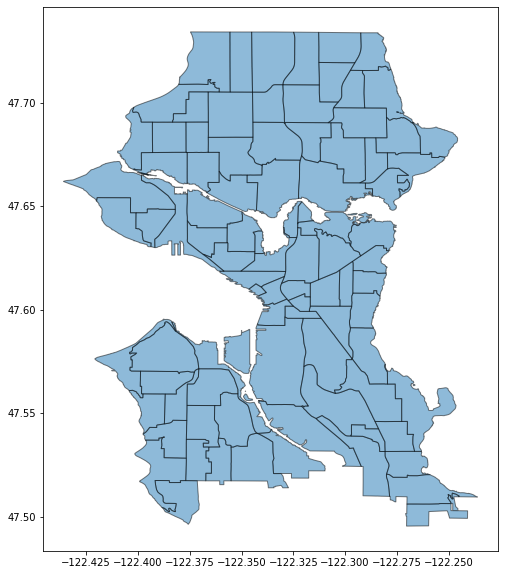

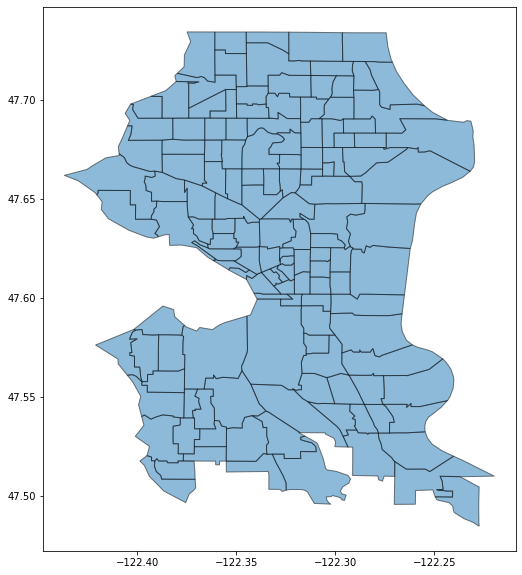

In [96]:
seattle_ax = seattle_df.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
seattle_fcc_ax = seattle_fcc_df.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')

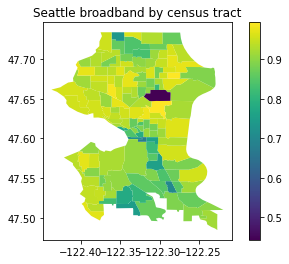

In [97]:
so.simple_map(seattle_fcc_df, 'f_broadband', 'geoid', 'Seattle broadband by census tract')

#### SO, we need to group the census tracts into neighborhoods and we are good to go! This is changing out df, doesn't require adapting their simple map code

<br></br>

### City Two: Denver

In [98]:
denver_df = geopandas.read_file("/tmp/neighborhood-data/denver/denver_1032/statistical_neighborhoods.shp")
denver_df.head()

,NBHD_ID,NBHD_NAME,TYPOLOGY,NOTES,geometry
0,2,Auraria,None,None,"POLYGON ((-105.00042 39.74552, -105.00041 39.7..."
1,21,Cory - Merrill,None,None,"POLYGON ((-104.94070 39.69540, -104.94070 39.6..."
2,7,Belcaro,None,None,"POLYGON ((-104.94070 39.71156, -104.94069 39.7..."
3,70,Washington Park,None,None,"POLYGON ((-104.95931 39.71566, -104.95931 39.7..."
4,71,Washington Park West,None,None,"POLYGON ((-104.97342 39.68982, -104.97356 39.6..."


Census IDs from: https://denvergov.org/opendata/dataset/city-and-county-of-denver-census-tracts-2010

In [101]:
# census df
denver_census = pd.read_csv("/tmp/neighborhood-data/denver/denver_census_tracts_2010.csv")

In [102]:
denver_census.head()

,TRACT_NAME,GEOID_TRACT,GEOID_NUM,POPULATION_2010,HISPANIC_2010,WHITE_2010,BLACK_2010,NATIVE_AM_2010,ASIAN_2010,HAWPACIS_2010,...,RENTED_AGE_25_TO_34,RENTED_AGE_35_TO_44,RENTED_AGE_45_TO_54,RENTED_AGE_55_TO_59,RENTED_AGE_60_TO_64,RENTED_AGE_65_TO_74,RENTED_AGE_75_TO_84,RENTED_AGE_85_PLUS,SHAPE_Length,SHAPE_Area
0,Census Tract 17.01,8031001701,8.031002e+09,4350.0,290.0,3539.0,94.0,16.0,327.0,1.0,...,653.0,255.0,204.0,96.0,97.0,195.0,127.0,41.0,0.046437,0.000120
1,Census Tract 17.02,8031001702,8.031002e+09,3648.0,355.0,2744.0,254.0,34.0,122.0,4.0,...,619.0,215.0,216.0,117.0,68.0,63.0,30.0,10.0,0.042534,0.000117
2,Census Tract 18,8031001800,8.031002e+09,3209.0,1091.0,1810.0,128.0,33.0,75.0,0.0,...,337.0,136.0,166.0,82.0,56.0,71.0,45.0,10.0,0.047632,0.000102
3,Census Tract 19.01,8031001901,8.031002e+09,2910.0,1416.0,708.0,565.0,28.0,88.0,1.0,...,224.0,137.0,87.0,43.0,32.0,78.0,36.0,14.0,0.064075,0.000245
4,Census Tract 19.02,8031001902,8.031002e+09,705.0,62.0,555.0,27.0,5.0,29.0,2.0,...,6.0,5.0,4.0,2.0,0.0,0.0,0.0,0.0,0.055663,0.000176


In [109]:
strint(denver_census['GEOID_NUM'][1])

8031001702

In [120]:
# pull out a list of indexes:
indexes = []
for tract in denver_census['GEOID_TRACT']:
    temp = fcc_df['geoid'].isin([('0' + str(tract))])
    if True in list(temp):
        loc = list(temp).index(True)
        indexes.append(loc)

In [121]:
denver_fcc_df = fcc_df.loc[indexes]

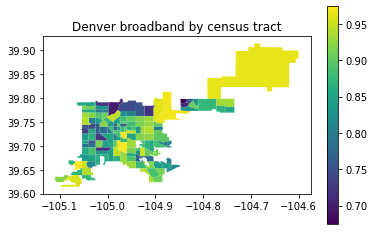

In [122]:
so.simple_map(denver_fcc_df, 'f_broadband', 'geoid', 'Denver broadband by census tract')